# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from tpot import TPOTRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)


logging.basicConfig(level=logging.INFO)

# Call_def

In [2]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_Balance_Regression,
    over_under_sampling_regression,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_regressor,
    random_search_regressor,
    get_regressor,
    plot_feature_importance_Regression,
    get_x_y,
    Check_Overfitting_Regression,
    evaluate_model_regression,
)

# call_visualization_def

In [3]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [4]:
df = read_data(r'Housing.csv')
original_df = copy.deepcopy(df)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Make the target is last column
df = target_last_col(df,'price')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


# Get Information of Data

In [6]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [7]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,area,int64,"[7420, 8960, 9960, 7500, 8580, 16200, 8100, 57...",284,545,0
1,bedrooms,int64,"[4, 3, 5, 2, 6, 1]",6,545,0
2,bathrooms,int64,"[2, 4, 1, 3]",4,545,0
3,stories,int64,"[3, 4, 2, 1]",4,545,0
4,mainroad,object,"[yes, no]",2,545,0
5,guestroom,object,"[no, yes]",2,545,0
6,basement,object,"[no, yes]",2,545,0
7,hotwaterheating,object,"[no, yes]",2,545,0
8,airconditioning,object,"[yes, no]",2,545,0
9,parking,int64,"[2, 3, 0, 1]",4,545,0


# drop not useful columns

#### list of columns

In [8]:
# not_useful_columns_name = ['', '', '']
# not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [9]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [10]:
# convert_to_numeric_columns_name = ['', '', '']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [11]:
# convert_to_numeric(df=df, column_name='')

# Describe numerical column and his information

In [12]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [13]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


# Describe object column and his information

In [14]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [15]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Data Encoding columns with 2 unique values

In [16]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [17]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,1,1,1,1,2,1,furnished,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,furnished,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,semi-furnished,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,furnished,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,furnished,11410000


# check columns have nulls

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    int64 
 5   guestroom         545 non-null    int64 
 6   basement          545 non-null    int64 
 7   hotwaterheating   545 non-null    int64 
 8   airconditioning   545 non-null    int64 
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    int64 
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [19]:
df.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

## Identify columns with missing values

In [20]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [21]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [22]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [23]:
# remove_missing_rows(df=df)

## check columns with missing values

In [24]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Filling Missing Values

### Filling Missing Values for all DataFrame

In [25]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [26]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [27]:
# df = fill_missing_values_column(df, columns='', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [28]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [29]:
outliers_df = check_outliers(df)

area               545
bedrooms           107
bathrooms            1
stories             41
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price              545
dtype: int64


## check outliers (plots)

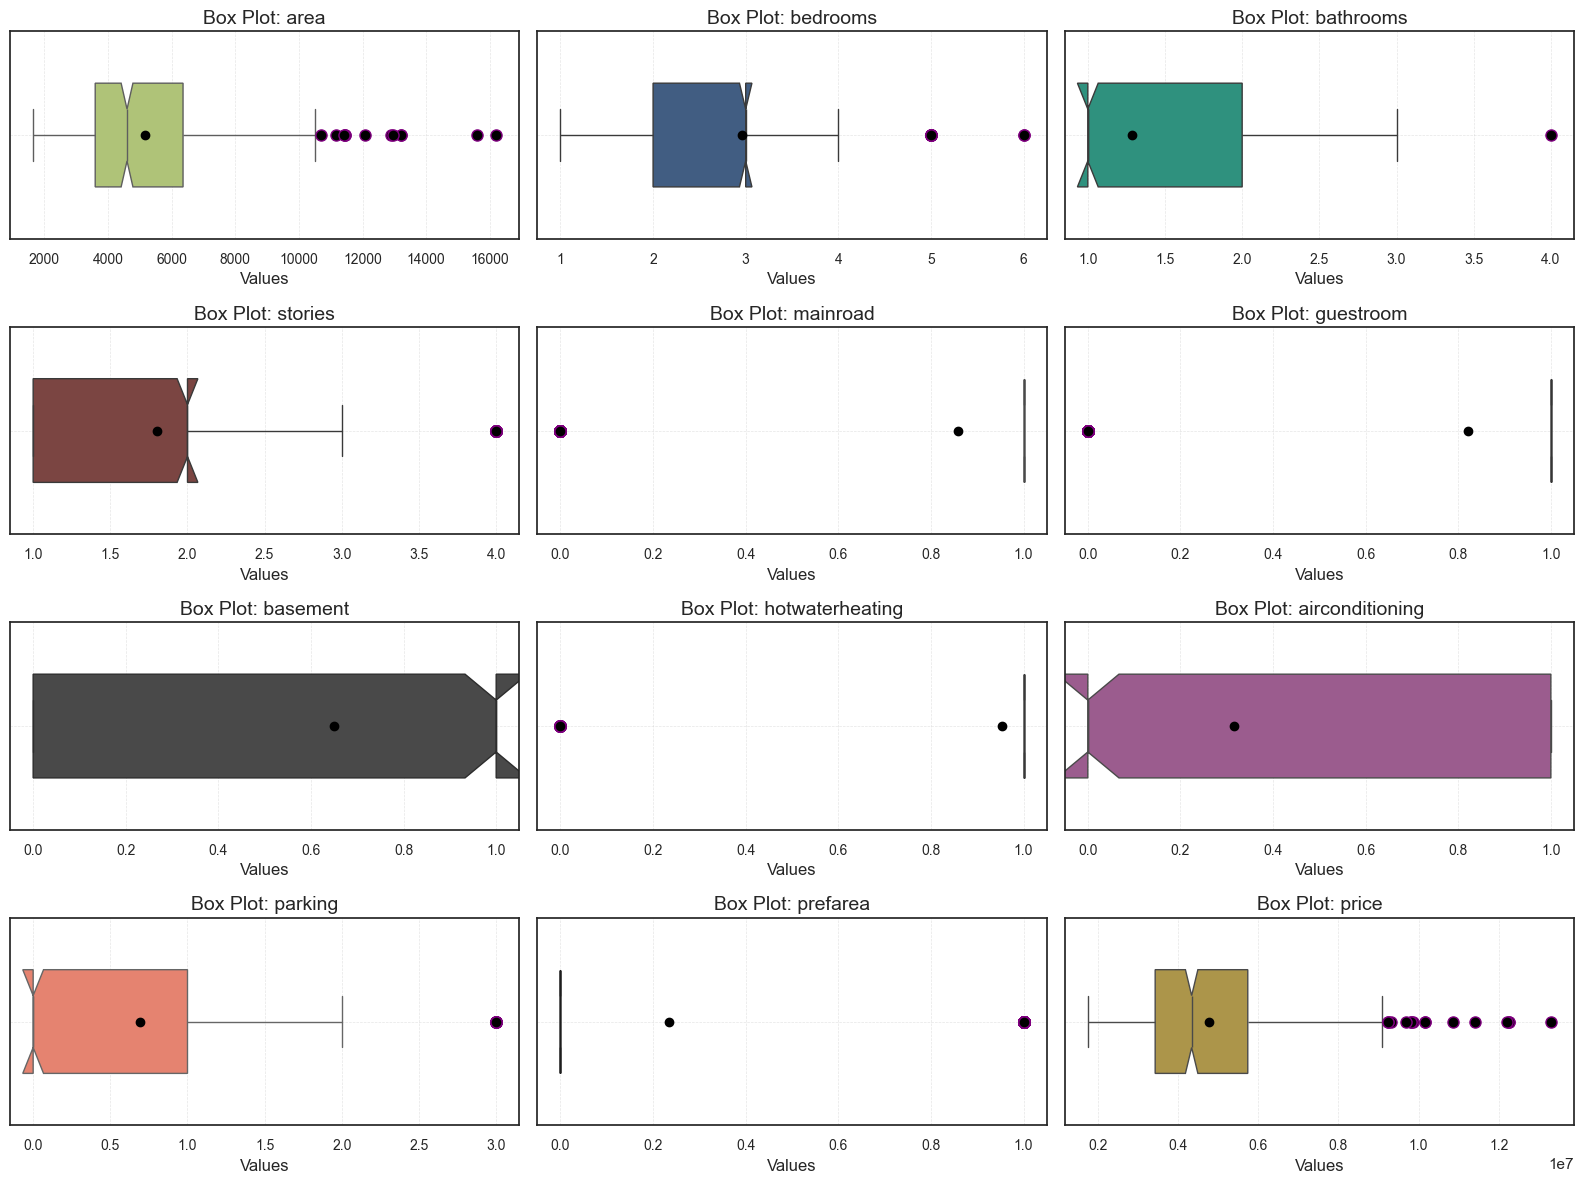

In [30]:
box_plot_all_columns(df, subplot_row = 3)

# Check the range of out column

INFO:root:Binning the data for column: price into 8 bins
INFO:root:Creating count plot for binned data of column: price


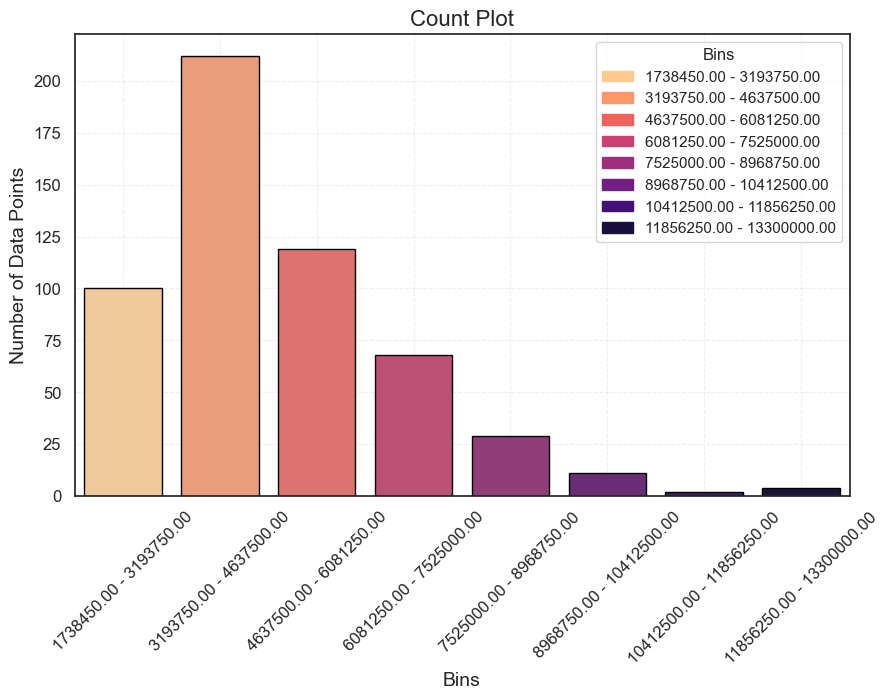

In [31]:
check_Balance_Regression(df, column_plot='price', div_number=8)

# Visualization

In [32]:
# use ML_visualization to make plot from the data

## Histogram

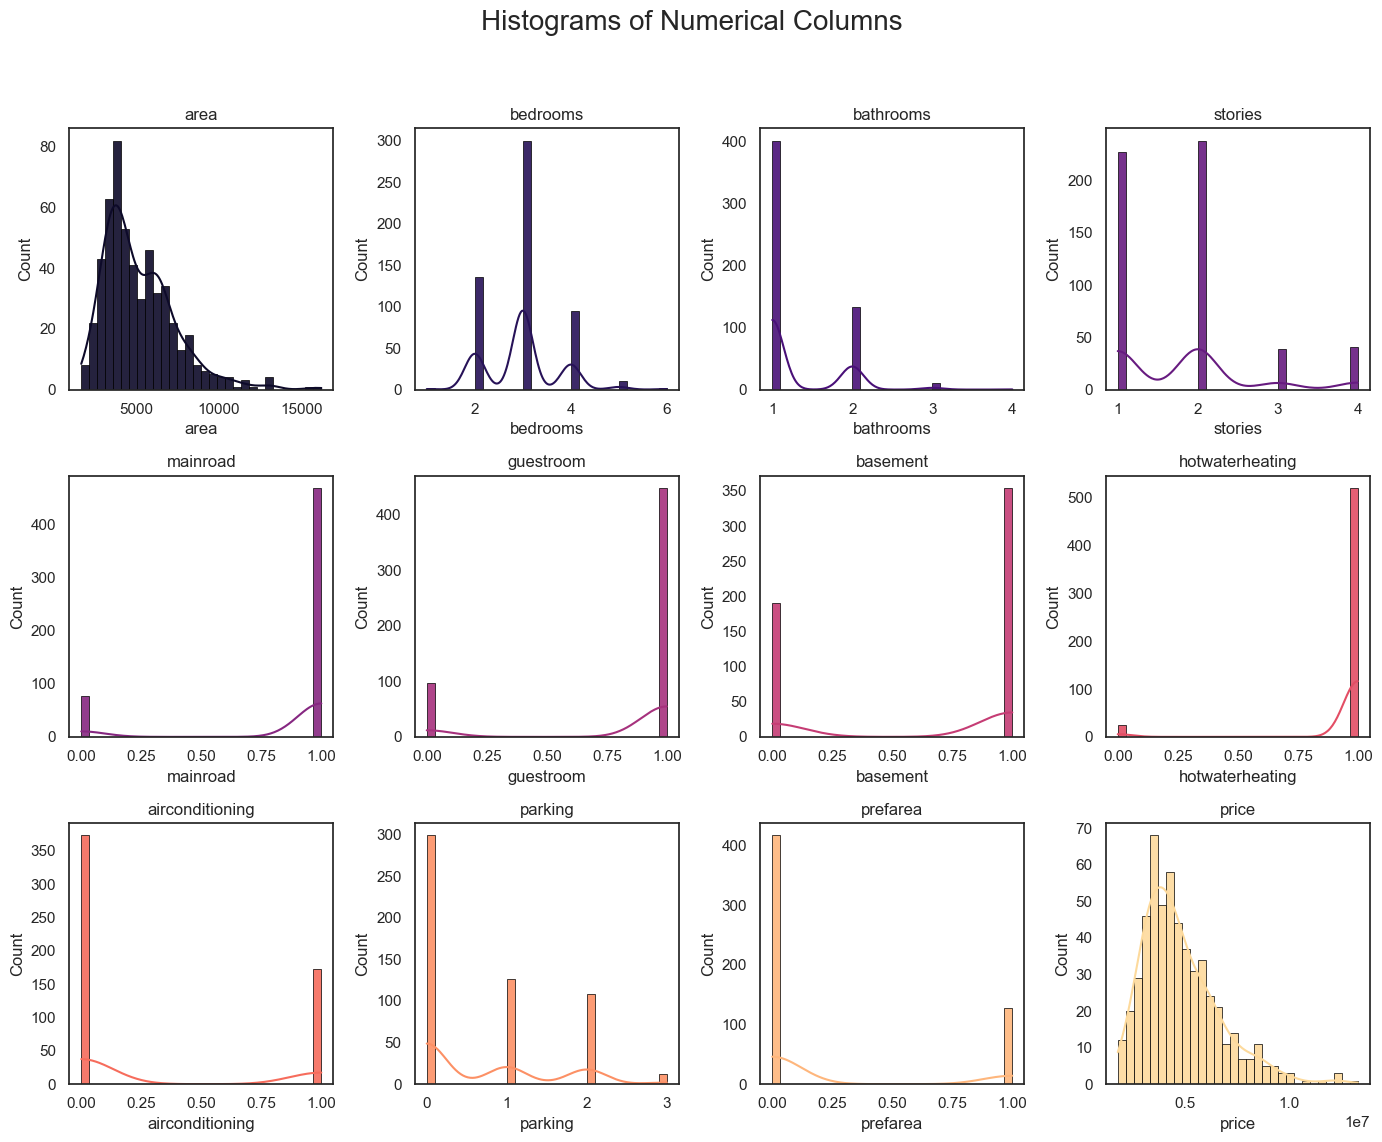

In [33]:
plot_histograms(df,column=None, bins=30)

# Visualization by Groupby and pivot

## Groupby and pivot

### Groupby

In [34]:
# grouped_df = df.groupby('')

### pivot

In [35]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [36]:
calculate_correlation(df, outcome_column='price',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
          Variable  Pearson Coefficient       P-Value
0             area             0.535997  7.388225e-42
2        bathrooms             0.517545  1.139322e-38
8  airconditioning             0.452954  6.310970e-29
3          stories             0.420712  8.668397e-25
9          parking             0.384394  1.238378e-20

area
The Pearson Correlation Coefficient for area is 0.5360 with a P-value of P = 7.388e-42

bathrooms
The Pearson Correlation Coefficient for bathrooms is 0.5175 with a P-value of P = 1.139e-38

airconditioning
The Pearson Correlation Coefficient for airconditioning is 0.4530 with a P-value of P = 6.311e-29

stories
The Pearson Correlation Coefficient for stories is 0.4207 with a P-value of P = 8.668e-25

parking
The Pearson Correlation Coefficient for parking is 0.3844 with a P-value of P = 1.238e-20


,Variable,Pearson Coefficient,P-Value
0,area,0.535997,7.388225e-42
2,bathrooms,0.517545,1.139322e-38
8,airconditioning,0.452954,6.310970e-29
3,stories,0.420712,8.668397e-25
9,parking,0.384394,1.238378e-20


# Visualize Correlation with Heatmap

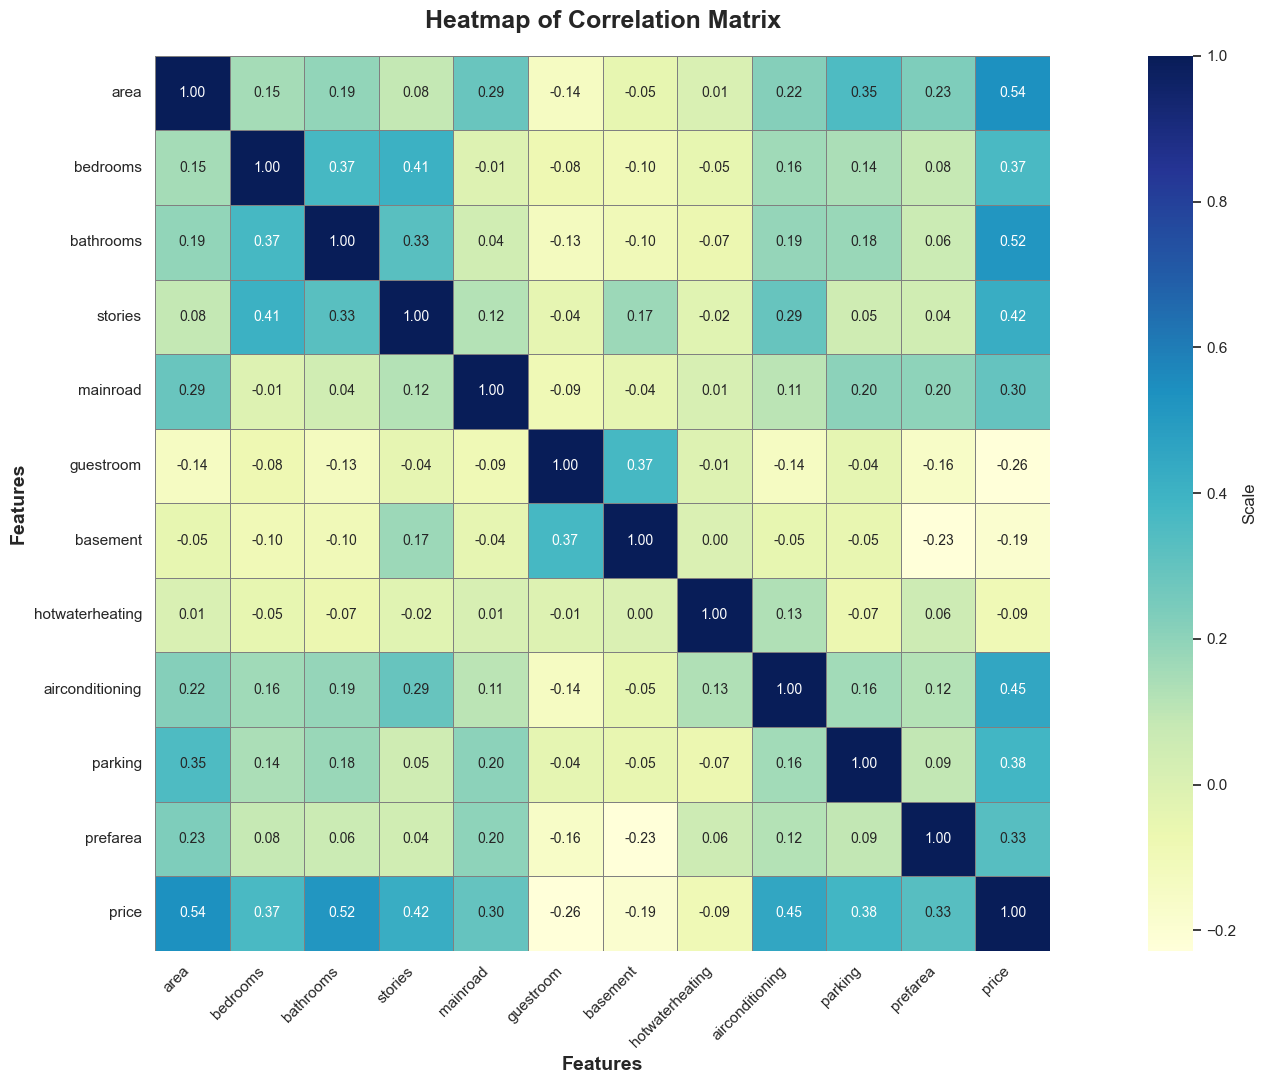

In [37]:
correlations = Heatmap_Correlation(df, mask=-1)

# Data Encoding

In [38]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['furnishingstatus']

In [39]:
column = ['furnishingstatus']

df = encode_column(df, columns = column, method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')
# df = encode_column(df, columns = '', method='target',target='')
# ordinal_categories = df['Dependents'].value_counts().index.to_list()
# df = encode_column(df, columns = '', method= 'ordinal', ordinal_categories=ordinal_categories)

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [40]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,1,1,1,1,2,1,13300000,0.0,0.0
1,8960,4,4,4,1,1,1,1,1,3,0,12250000,0.0,0.0
2,9960,3,2,2,1,1,0,1,0,2,1,12250000,1.0,0.0
3,7500,4,2,2,1,1,0,1,1,3,1,12215000,0.0,0.0
4,7420,4,1,2,1,0,0,1,1,2,0,11410000,0.0,0.0


# Make the target is last column

In [41]:
df = target_last_col(df,'price')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,7420,4,2,3,1,1,1,1,1,2,1,0.0,0.0,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,0.0,0.0,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,1.0,0.0,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,0.0,0.0,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,0.0,0.0,11410000


# Get X , Y (TVT)

In [42]:
x,y = get_x_y(df,'price')

In [43]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target='price')

In [44]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (383, 13)
x_valid shape = (53, 13)
x_test shape = (109, 13)
y_train shape = (383,)
y_valid shape = (53,)
y_test shape = (109,)


# Get train, valid and test data in same time

In [45]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='price',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [46]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [47]:
print(len(df.columns))

14


In [48]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_regression', k=10)
x = FS_model.transform(x)

# Dimensionality Reduction

In [49]:
# print(len(df.columns))

In [50]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, method= 'PCA', n_components=10)
# x = DR_model.transform(x)

# Train

## Grid Search

In [51]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

In [52]:
ensemble_estimators = [('rf', RandomForestRegressor()), ('svr', SVR())]
best_params, best_score, best_estimator = grid_search_regressor('XGBoost', x_train, y_train, scoring='r2',cv=type_cross_valid)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
best_params = 0.5962078928947449


In [53]:
model = best_estimator
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Random Search

In [54]:
# ensemble_estimators = [('rf', RandomForestRegressor()), ('svr', SVR())]
# best_params, best_score, best_estimator = random_search_regressor('RandomForestRegressor', x_train, y_train, cv=type_cross_valid)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [55]:
# model = best_estimator
# model

## Train Without Search

In [56]:
# model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=5, plot=True)
# model

In [57]:
# # Linear Regression
# linear_regression_model = get_regressor('linear_regression', x_train, y_train)

# # Ridge Regression
# ridge_regression_model = get_regressor('ridge_regression', x_train, y_train, alpha=1.0)

# # Lasso Regression
# lasso_regression_model = get_regressor('lasso_regression', x_train, y_train, alpha=1.0)

# # K-Neighbors Regressor
# kneighbors_regressor_model = get_regressor('kneighbors_regressor', x_train, y_train, n_neighbors=5, algorithm='auto')

# # Support Vector Regressor
# svr_model = get_regressor('svr', x_train, y_train, kernel='rbf', C=1.0)

# # Decision Tree Regressor
# decision_tree_regressor_model = get_regressor('decision_tree_regressor', x_train, y_train, criterion='mse', max_depth=None)

# # Random Forest Regressor
# random_forest_regressor_model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=None)

# # Bagging Regressor
# bagging_regressor_model = get_regressor('bagging_regressor', x_train, y_train, n_estimators=10, base_estimator=None)

# # AdaBoost Regressor
# adaboost_regressor_model = get_regressor('adaboost_regressor', x_train, y_train, n_estimators=50, learning_rate=1.0)

# # Gradient Boosting Regressor
# gradient_boosting_regressor_model = get_regressor('gradient_boosting_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # XGBoost Regressor
# xgboost_regressor_model = get_regressor('xgboost_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # Stacking Regressor
# stacking_regressor_model = get_regressor('stacking_regressor', x_train, y_train, estimators=[
#     ('lr', LinearRegression()),
#     ('rf', RandomForestRegressor(n_estimators=10))
# ], final_estimator=LinearRegression())


# Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 507541.2866
Validation MAE: 719758.3585

Mean Squared Error (MSE):
Training MSE: 499382437741.0054
Validation MSE: 876948124013.7854

Root Mean Squared Error (RMSE):
Training RMSE: 706669.9638
Validation RMSE: 936455.0838

R² Score:
Training R²: 0.8451
Validation R²: 0.5738

Cross-Validation (CV):
Cross-Validation Scores: [1.71458984e+12 1.42115562e+12 7.24065998e+11 9.01635674e+11
 1.30574991e+12]
Cross-Validation Mean Score: 1213439409642.0278


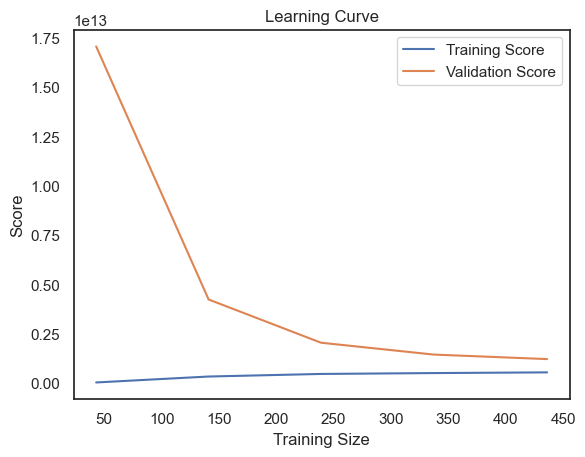

In [58]:
Check_Overfitting_Regression(model,x,y,x_train,y_train,x_valid,y_valid)

# plot feature importance

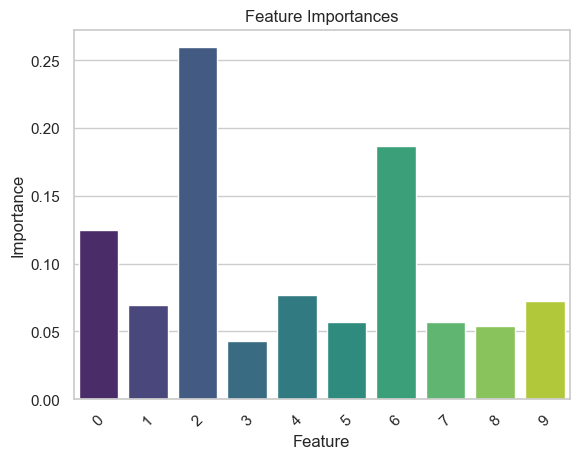

In [59]:
plot_feature_importance_Regression(model=model,x_train=x_train,orientation=None)

# Get y_predict

In [60]:
y_pred = model.predict(x_test)

# Evaluate model

### MAE, MSE, RMSE and R2

Mean Absolute Error (MAE) = 951814.9312
Mean Squared Error (MSE) = 1786383687474.5046
Root Mean Squared Error (RMSE) = 1336556.6533
R² Score = 0.6466


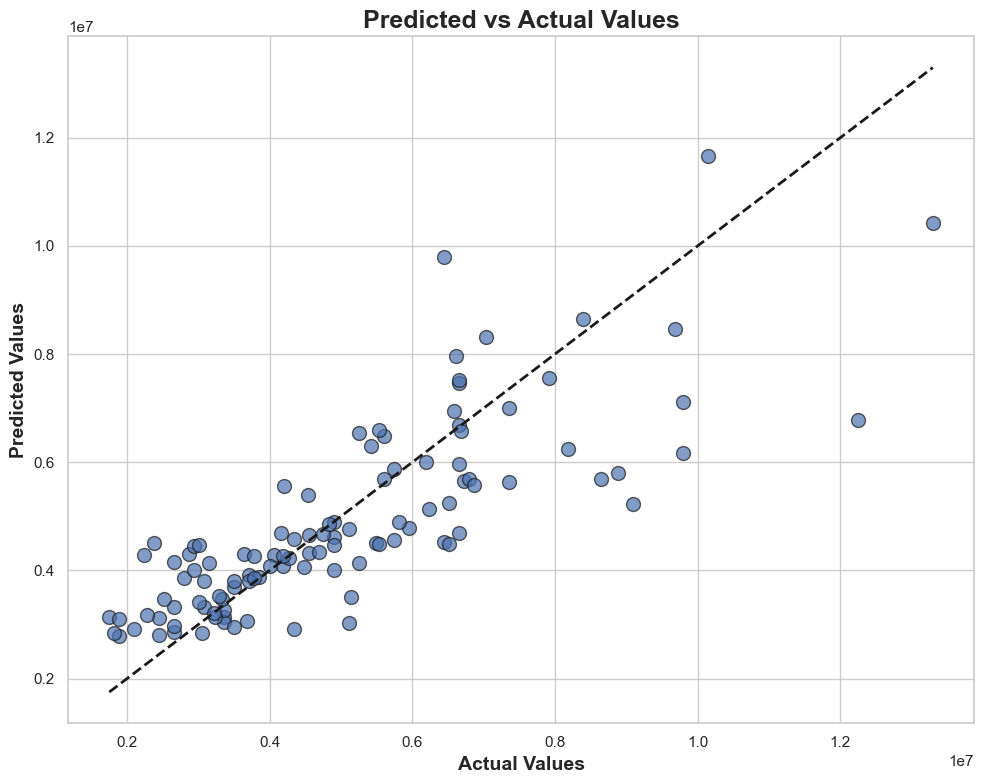

In [61]:
evaluate_model_regression(y_test, y_pred)